In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use('default')

In [4]:
df = pd.read_csv("e:/Vacancy_arima2.csv", encoding= 'ansi') 

In [5]:
df.head()

,Date,Rent_pred
0,2015-03-01,13.058
1,2015-06-01,12.153
2,2015-09-01,12.087
3,2015-12-01,10.335
4,2016-03-01,12.260


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df = df.set_index(df['Date'])
df = df.iloc[:, 1]
df.head()

Date
2015-03-01    13.058
2015-06-01    12.153
2015-09-01    12.087
2015-12-01    10.335
2016-03-01    12.260
Name: Rent_pred, dtype: float64

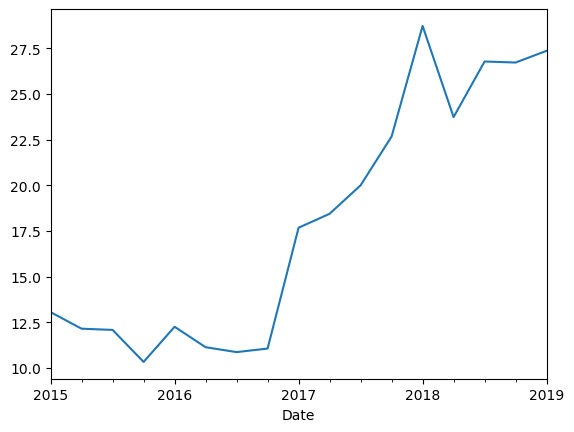

In [8]:
df.plot()

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
m = ARIMA(df, [0,1,1])
r = m.fit()
print(r.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Rent_pred   No. Observations:                   16
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -38.270
Method:                       css-mle   S.D. of innovations              2.640
Date:                Tue, 08 Oct 2019   AIC                             82.540
Time:                        17:47:51   BIC                             84.857
Sample:                    06-01-2015   HQIC                            82.658
                         - 03-01-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9375      0.506      1.852      0.085      -0.054       1.930
ma.L1.D.Rent_pred    -0.2532      0.215     -1.176      0.259      -0.675       0.169
                        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


In [11]:
r.forecast(steps= 1)

(array([28.42320722]),
 array([2.64019691]),
 array([[23.24851637, 33.59789807]]))

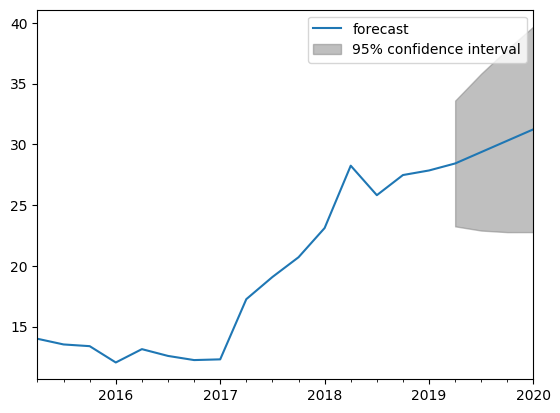

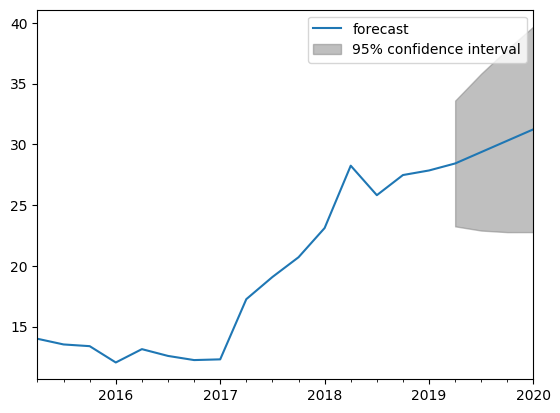

In [12]:
r.plot_predict(end=20, plot_insample=False)